In [ ]:
#Banka datasına bad için logistik regresyon yapılacak

In [1]:
import pandas as pd
import numpy as np

bankdata = pd.read_csv("C:/Users/cakahraman/Desktop/Data Science Bootcamp/hmelq.txt")

In [2]:
bankdata.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [5]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [10]:
bankdata = bankdata.dropna()
#NA bulunan satırları sildik, aslında sadece regresyon yapacaklarımız önemli ama olsun 2018 veriye düşüyor buda yeterli 

In [11]:
bankdata["bad"].value_counts()

0    1840
1     178
Name: bad, dtype: int64

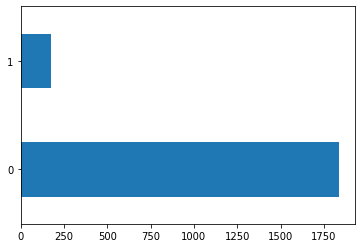

In [12]:
bankdata["bad"].value_counts().plot.barh();

In [13]:
bankdata.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [22]:
y = bankdata["bad"]
X = bankdata.drop(["bad", "reason", "job"], axis = 1)

In [23]:
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
153,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [24]:
import statsmodels.api as sm
loj = sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.261768
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2008
Method:                           MLE   Df Model:                            9
Date:                Wed, 18 Sep 2019   Pseudo R-squ.:                  0.1227
Time:                        22:17:09   Log-Likelihood:                -528.25
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 2.621e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.706e-05   1.04e-05     -2.600      0.009   -4.74e-05   -6.66e-06
mortdue    -3.409e-07   5.22e-06     -0.065      0.948   -1.06e-05     9.9e-06
value      -3.173e-06   4.29e-06     -0.739      0.460   -1.16e-05    5.24e-06
yoj           -0.0342      0.013     -2.727      0.006      -0.059      -0.010
derog          0.5800      0.122      4.758      0.000       0.341       0.819
delinq         0.7398      0.086      8.610      0.000       0.571       0.908
clage         -0.0084      0.001     -6.358      0.000      -0.011      -0.006
ninq           0.0266      0.047      0.571      0.568      -0.065       0.118
clno          -0.0505      0.011     -4.635      0.000      -0.072      -0.029
debtinc        0.0222      0.007      3.126      0.002       0.008       0.036
==============================================================================
"""

In [25]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X,y)
loj_model 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
loj_model.intercept_

array([-0.00256361])

In [27]:
loj_model.coef_

array([[-3.45744369e-05, -6.99561375e-06, -1.60344396e-06,
        -1.76926822e-02,  6.56856812e-03,  1.17615246e-02,
        -8.77179764e-03,  4.17663965e-03, -1.69201255e-02,
         2.71202775e-02]])

In [28]:
y_pred = loj_model.predict(X)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix(y,y_pred)

array([[1835,    5],
       [ 178,    0]], dtype=int64)

In [32]:
accuracy_score(y,y_pred)
#%91 accuracy is good

0.9093161546085233

In [33]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1840
           1       0.00      0.00      0.00       178

    accuracy                           0.91      2018
   macro avg       0.46      0.50      0.48      2018
weighted avg       0.83      0.91      0.87      2018



In [34]:
y_probs =  loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [35]:
y_probs[0:10]

array([0.06208465, 0.18770511, 0.01302188, 0.16523763, 0.17999443,
       0.01576803, 0.14665005, 0.03519301, 0.24897578, 0.03939954])

In [69]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [70]:
confusion_matrix(y,y_pred)

array([[1835,    5],
       [ 178,    0]], dtype=int64)

In [71]:
accuracy_score(y,y_pred)

0.9093161546085233

In [74]:
loj_model.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
from sklearn.metrics import roc_auc_score,roc_curve
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
logit_roc_auc

0.4986413043478261

In [53]:
fpr, tpr, threshold = roc_curve(y, loj_model.predict_proba(X)[:,1])
fpr[0:10]

array([0.        , 0.00054348, 0.00326087, 0.00326087, 0.00380435,
       0.00380435, 0.00434783, 0.00434783, 0.0048913 , 0.0048913 ])

Text(0, 0.5, 'True Positive Oranı')

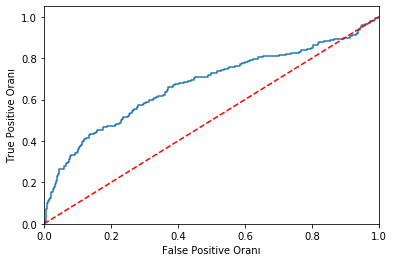

In [55]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')